In [1]:
# Tools
options(warn=-1)
library(spgwr)
library(tmap)
library(ggplot2) # for the mapping tools
library(sf)
library(tibble)
library(GISTools)

library(rgdal)
library(grid)
library(spdep)

Loading required package: sp

Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

NOTE: This package does not constitute approval of GWR
as a method of spatial analysis; see example(gwr)

Linking to GEOS 3.8.1, GDAL 3.1.4, PROJ 6.3.1

Loading required package: maptools

Checking rgeos availability: TRUE

Loading required package: RColorBrewer

Loading required package: MASS

Loading required package: rgeos

rgeos version: 0.5-5, (SVN revision 640)
 GEOS runtime version: 3.8.1-CAPI-1.13.3 
 Linking to sp version: 1.4-2 
 Polygon checking: TRUE 


rgdal: version: 1.5-18, (SVN revision 1082)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.1.4, released 2020/10/20
Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/4.0/Resources/library/rgdal/gdal
GDAL binary built with G

## Question 1
Ecrire un code qui permet de représenter les comtés de Géorgie (dataframe georgia) en choisissant une couleur de votre choix mais avec 11 classes pour décrire la distribution du revenu médian en milliers de dollars (MedInc). Cette carte devra contenir une légende et doit permettre d’exporter cette carte en format TIFF.

In [2]:
data(georgia)
# type de donnée
class(georgia)

[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

In [3]:
# conversion to sf
georgia_sf = st_as_sf(georgia)
class(georgia_sf)

[1] "sf"         "data.frame"

In [4]:
summary(georgia@data)

    Latitude        Longitud         TotPop90         PctRural     
 Min.   :30.72   Min.   :-85.50   Min.   :  1915   Min.   :  2.50  
 1st Qu.:31.79   1st Qu.:-84.44   1st Qu.:  9220   1st Qu.: 54.70  
 Median :32.75   Median :-83.69   Median : 16934   Median : 72.30  
 Mean   :32.81   Mean   :-83.58   Mean   : 40744   Mean   : 70.18  
 3rd Qu.:33.79   3rd Qu.:-82.85   3rd Qu.: 36058   3rd Qu.:100.00  
 Max.   :34.92   Max.   :-81.09   Max.   :648951   Max.   :100.00  
    PctBach          PctEld          PctFB           PctPov     
 Min.   : 4.20   Min.   : 1.46   Min.   :0.040   Min.   : 2.60  
 1st Qu.: 7.60   1st Qu.: 9.81   1st Qu.:0.415   1st Qu.:14.05  
 Median : 9.40   Median :12.07   Median :0.720   Median :18.60  
 Mean   :10.95   Mean   :11.74   Mean   :1.131   Mean   :19.34  
 3rd Qu.:12.00   3rd Qu.:13.70   3rd Qu.:1.265   3rd Qu.:24.65  
 Max.   :37.50   Max.   :22.96   Max.   :6.740   Max.   :35.90  
    PctBlack           X                 Y                 ID       


In [9]:
georgia_medInd = tm_shape(georgia_sf) +
  tm_polygons("MedInc", title = " Revenue Média", palette = "-GnBu",
              style = "kmeans",
              legend.hist = T) +
  tm_scale_bar(width = 0.22, position = c("right", "top")) +
  tm_compass()+
  tm_layout(frame = F, title = "Georgia", 
            title.size = 2, 
            #title.position = c(0.55, "top"), 
            legend.hist.size = 0.5, 
            legend.outside = T)

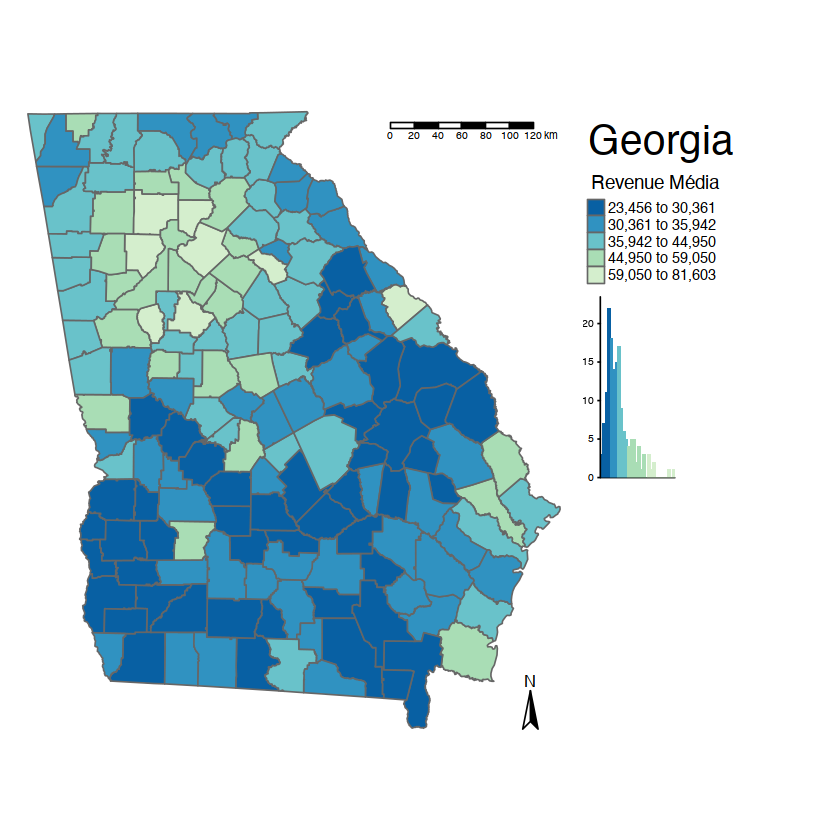

In [10]:
georgia_medInd

In [11]:
tmap_save(filename = "georgia_medInd.tiff")

Map saved to georgia_medInd.tiff

Resolution: 1951.103 by 2260.26 pixels

Size: 6.503677 by 7.534199 inches (300 dpi)



### Question 2
Il est connu que l’on peut faire dire des choses fallacieuses à des cartes. L’une des erreurs communes est de mal représenter la distribution d’une variable ne continue en ne la catégorisant pas de la bonne façon. Dans cette question vous devez produire trois cartes représentant la même variable en montrant comment le choix du cut peut influencer la représentation du phénomène sur la carte. Pour cela vous utiliserez la variable représentant le nombre de maisons dans le New Heaven (variable HSE_UNITS dans l’objet blocks) que vous découperez en 5 classes en utilisant différentes manières de constituer ces classes (quantiles, rangs absolus, écart-type). Rajouter des légendes sur vos cartes.


In [ ]:
# Hints
p1 <- tm_shape(...) # assign the plots to a variable
pushViewport                # from the grid package, used earlier...
viewport            # ...to plot multiple tmaps
?quantileCuts       # quantiles, ranges std.dev...
?rangeCuts          # ... from GISTools package
?sdCuts
breaks              # to specify breaks in tm_polygon
tmap_mode('plot')   # to specify a map view
# Tools
library(tmap)           # for the mapping tools
library(grid)           # for plotting the maps together
data(newhaven)      # to load the New Haven dat

## Question 3
Objectif : création d’un attribut secondaire et utiliser une condition logique pour sélectionner des objets quand cet opérateur logique s’applique aux attributs que vous venez de créer. Une entreprise souhaite commercialiser un produit en direction des populations vivant dans des zones rurales. Leur modèle leur permet de conclure qu’elle pourra vendre une unité de leur produit par tranche de 20 habitants de ces zones rurales visitées par un représentant de leur équipe de vente. Pour cela elle veut déterminer quels sont les comtés des données de Géorgie qui a une densité de 20 habitants par km². A partir des données écrire le code qui permet de sélectionner des comtés sur la base d’un critère de densité de population. Pour cela vous calculerez un score de densité de population et représenterez sur une carte les comtés qui ont une densité supérieure à 20 habitants par km²

In [ ]:
# Hints
library(GISTools)   # for the mapping tools
data(georgia)       # use georgia2 as it has a geographic projection
help("!")       # to examine logic operators
as.numeric      # use to coerce new attributes you create to numeric format
                # eg georgia.sf$NewVariable <- as.numeric(1:159)
# Tools
st_area         # a function in the st package
